In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid

plt.style.use("seaborn-v0_8")
random_state = 42

---
# Support Vector Machine (|||)

linear parametric method and nonlinear nonparametric method.
the linear variant is a sort of logistic regression, and the nonlinear variant is a nearest neighbors that learns.
...

In [2]:
df = pd.read_csv("datasets/iris.data.txt")
df_X = df.iloc[:, [0, 1]]
encoder = LabelEncoder()
df_Y = encoder.fit_transform(df["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    df_X,
    df_Y,
    test_size=0.33,
    random_state=random_state,
)

In [3]:
# Preprocessing function for "l1", "l2", "l-max", "standard", "min-max"
def preprocess(X_train, X_test, modality, df_X=None):
    X_train_p = X_train
    X_test_p = X_test
    if df_X is not None:
        df_X_p = df_X

    if modality == "l2" or modality == "l1" or modality == "l-max":
        if modality == "l-max":
            modality = "max"
        X_train_p = preprocessing.normalize(X_train, norm=modality)
        X_test_p = preprocessing.normalize(X_test, norm=modality)
        if df_X is not None:
            df_X_p = preprocessing.normalize(df_X, norm=modality)

    if modality == "standard":
        scaler = preprocessing.StandardScaler()
        scaler.fit(X_train)
        X_train_p = scaler.transform(X_train)
        X_test_p = scaler.transform(X_test)
        if df_X is not None:
            df_X_p = scaler.transform(df_X)

    if modality == "min-max":
        scaler = preprocessing.MinMaxScaler()
        scaler.fit(X_train)
        X_train_p = scaler.transform(X_train)
        X_test_p = scaler.transform(X_test)
        if df_X is not None:
            df_X_p = scaler.transform(df_X)

    return X_train_p, X_test_p, df_X_p


# KNeighborsClassifier - GridSearch for [weights, metric, n_neighbours]
param_grid = {
    "C": [
        *range(1, 10, 1),
        *range(10, 100, 10),
        *range(100, 1000, 100),
    ],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

# ParamGrid Length
print("ParamGrid length: {}".format(len(list(ParameterGrid(param_grid)))))

gs = GridSearchCV(
    svm.SVC(random_state=random_state),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    # verbose=3,
)

ParamGrid length: 216


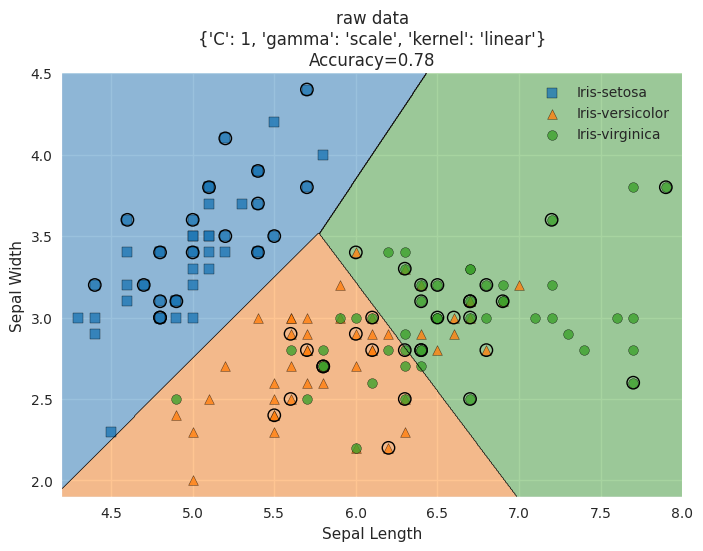

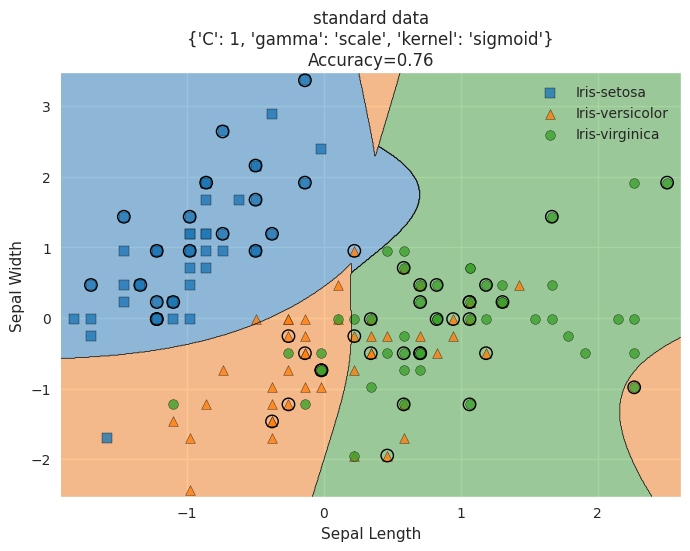

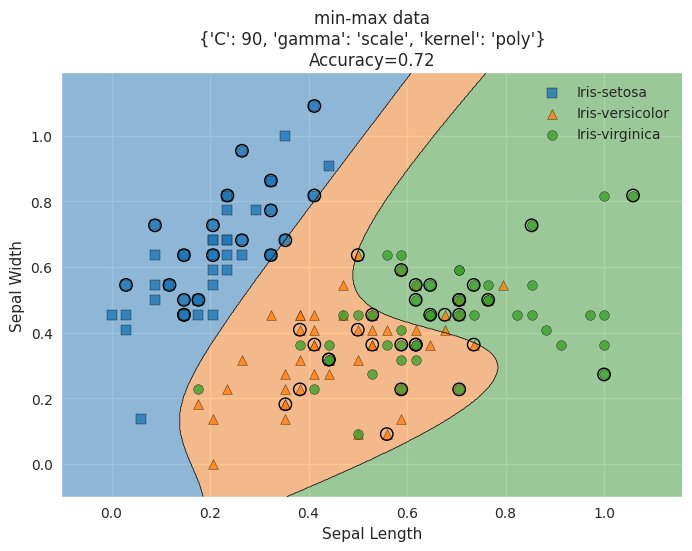

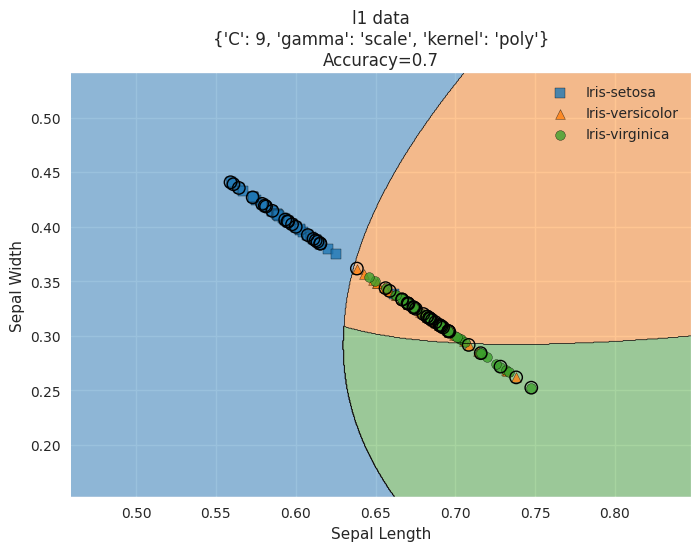

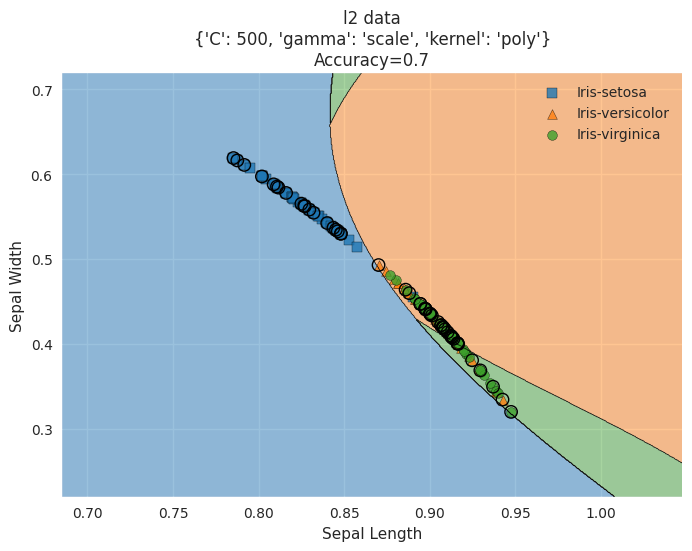

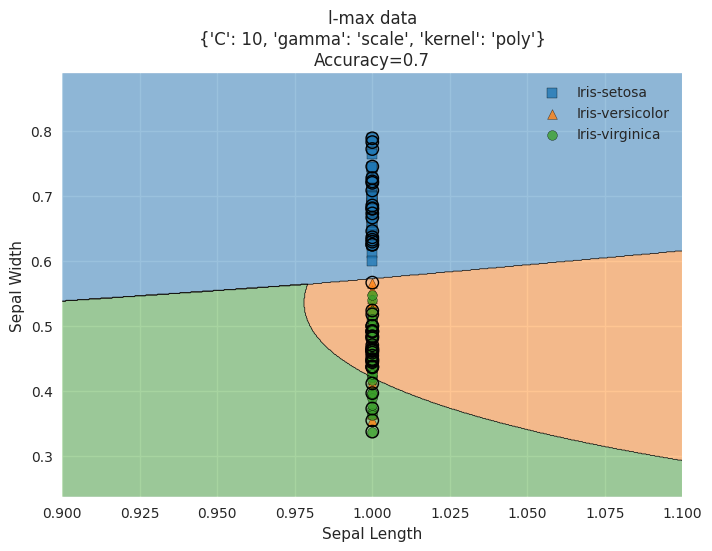

In [4]:
# For every preprocess modality
for modality in ["raw", "standard", "min-max", "l1", "l2", "l-max"]:
    # Preprocess
    X_train_p, X_test_p, df_X_p = preprocess(
        X_train.values, X_test.values, modality, df_X.values
    )

    # Fit
    gs.fit(X_train_p, y_train)

    # Plot decision Regions
    if df_X.shape[1] == 2:
        plot_decision_regions(
            df_X_p,
            df_Y,
            clf=gs,
            legend=2,
            X_highlight=X_test_p,
            n_jobs=-1,
            zoom_factor=10,
        )
        plt.xlabel(df_X.columns[0])
        plt.ylabel(df_X.columns[1])
        plt.legend(encoder.classes_)
        plt.title(
            "{} data\n{}\nAccuracy={}".format(
                modality, gs.best_params_, gs.score(X_test_p, y_test)
            )
        )
        plt.show()
    else:
        print(
            "{} data\n{}\nAccuracy={}".format(
                modality, gs.best_params_, gs.score(X_test_p, y_test)
            )
        )